# Семинар 7

# Теория

https://github.com/esokolov/ml-minor-hse/blob/master/colloquium-2017/colloquium_minor_problems_linear.pdf

Задачи 2, 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Логистическая регрессия

Рассмотрим искусственный датасет:

In [2]:
np.random.seed(13)

n = 50
X = np.random.normal(size=(n, 2))
y = np.zeros(n)
X[25:] += 3
y[:25] -= 1
y[25:] += 1

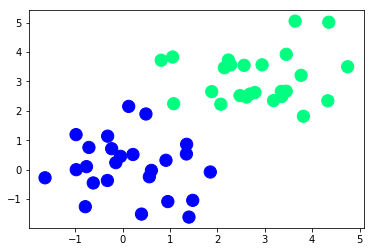

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=150)
plt.show()

Видим, что классы линейно разделимы. Но прежде чем идти дальше, давайте рассмотрим логистическую функцию:

$$ \sigma(x) = \frac{1}{1+e^{-x}}$$

Посмотрим, как она трансформирует $x \in [-5, 5]$:

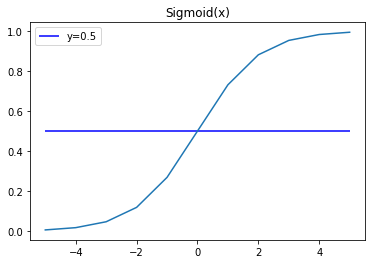

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 6)
plt.hlines(y=0.5, xmin=-5, xmax=5, label='y=0.5', color='b')
plt.plot(x, sigmoid(x))
plt.title("Sigmoid(x)")
plt.legend()
plt.show()

* Выходит, что сигмоида переводит любое числовое значение в интервал [0, 1].

* В задаче бинарной классификации мы можем рассматривать результат такого преобразования как вероятность принадлежности к положительному классу.

* Если значение сигмоиды больше `0.5`, то можем считать, что предсказали класс `1`, если меньше, то класс `-1`.

---

Итак, **Логистическая регрессия = сигмоида(Линейная регрессия)**

Что это значит?

У логистической регрессии будет ровно столько же параметров, сколько и у линейной.

И выглядит это вот так:

$$
\begin{array}{c}
a(x) = w_0 + w_1 x_1 + w_2 x_2 \\
p(y = 1 | x) = \sigma(a(x)) = \frac{1}{1 + e^{-a(x)}}\\
\end{array}
$$

## Градиентный спуск для логистической регрессии

1) Задача оптимизации :

$$
L(w) = \frac{1}{\ell}\sum\limits_{i=1}^\ell\log_2\left(1 + e^{-y_i\langle w, x_i\rangle}\right) \rightarrow \min_w
$$

2) Выведите формулу для шага градиентного спуска:

$$
w_T = w_{T - 1} - \eta \frac{\partial L(w_{T - 1})}{\partial w_{T - 1}} = ...
$$

In [5]:
X = np.c_[np.ones(n), X]
X

array([[ 1.00000000e+00, -7.12390662e-01,  7.53766379e-01],
       [ 1.00000000e+00, -4.45030783e-02,  4.51812339e-01],
       [ 1.00000000e+00,  1.34510171e+00,  5.32337888e-01],
       [ 1.00000000e+00,  1.35018790e+00,  8.61211374e-01],
       [ 1.00000000e+00,  1.47868574e+00, -1.04537713e+00],
       [ 1.00000000e+00, -7.88989025e-01, -1.26160595e+00],
       [ 1.00000000e+00,  5.62846785e-01, -2.43326252e-01],
       [ 1.00000000e+00,  9.13740705e-01,  3.17350923e-01],
       [ 1.00000000e+00,  1.27303280e-01,  2.15038297e+00],
       [ 1.00000000e+00,  6.06288657e-01, -2.67716500e-02],
       [ 1.00000000e+00, -9.84160782e-01,  1.19070527e+00],
       [ 1.00000000e+00,  9.52830611e-01, -1.08718159e+00],
       [ 1.00000000e+00, -1.45211333e-01,  2.37857838e-01],
       [ 1.00000000e+00, -1.63909341e+00, -2.78134517e-01],
       [ 1.00000000e+00,  1.39923842e+00, -1.61510796e+00],
       [ 1.00000000e+00,  4.90871833e-01,  1.89274222e+00],
       [ 1.00000000e+00, -6.20979702e-01

In [6]:
def grad(y, X, w):
    res = 0
    for i in range(len(X)):
        res += -y[i] * sigmoid(-y[i] * w @ X[i]) * X[i]
    res /= (len(X) * np.log(2))
    return res

In [7]:
# предсказание для одного объекта
def prediction(w, x):
    return sigmoid(w @ x)


# предсказание для всего датасета
def prediction_dataset(w, X):
    preds = []
    for i in range(len(X)):
        pred = prediction(w, X[i])
        if pred >= 0.5:
            preds.append(1)
        else:
            preds.append(-1)
    return np.array(preds)

In [10]:
N = 1000
eta = 0.01

w = np.zeros(3)

accuracy_list = []

for _ in range(N):
    w -= eta * grad(y, X, w)
    accuracy_list.append(accuracy_score(y, prediction_dataset(w, X)))

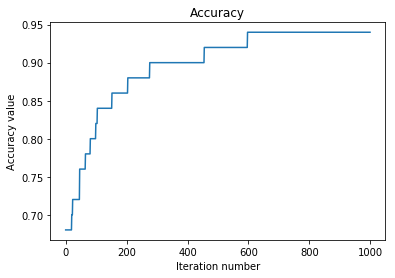

In [11]:
plt.plot(accuracy_list)
plt.title("Accuracy")
plt.xlabel("Iteration number")
plt.ylabel("Accuracy value")
plt.show()

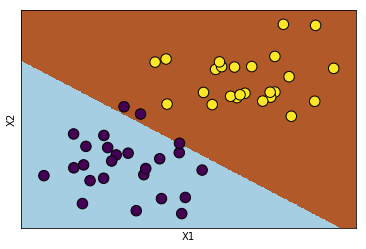

In [12]:
x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = prediction_dataset(w, np.c_[np.ones_like(xx.ravel()), xx.ravel(), yy.ravel()])>0.5

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', s=110)
plt.xlabel('X1')
plt.ylabel('X2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Полиномиальные признаки

**XOR проблема**

XOR – это "исключающее ИЛИ", булева функция со следующей таблицей истинности:

<img src="https://habrastorage.org/storage2/9af/1de/e09/9af1dee09d4d36ff0b15bdb4aae19e3b.png" width=400 align="center">

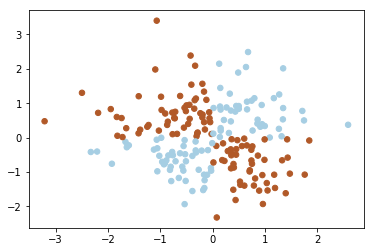

In [13]:
np.random.seed(13)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
plt.show()

In [14]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
    clf.fit(X, y)
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                               linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

In [15]:
from sklearn.linear_model import LogisticRegression

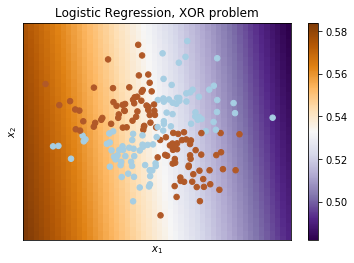

In [16]:
# Применяем логистическую регрессию к нашим данным
# И видим, что линейная модель не способна разделить точки правильно
plot_boundary(LogisticRegression(), X, y, "Logistic Regression, XOR problem")

### Что мы делаем?
Добавляем полиномиальные признаки!

Т.е. получаем несколько признаков из данных путем возведения их в степень и перемножения между собой.

**Пример с двумерными данными, degree=2**

$$\Large (a, b) \rightarrow (1, a, b, a^2, ab, b^2)$$

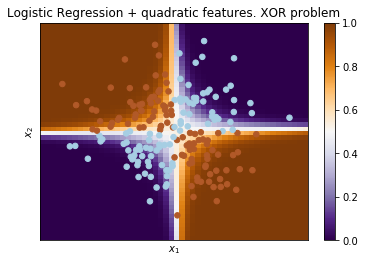

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('logit', LogisticRegression())])
plot_boundary(logit_pipe, X, y,
        "Logistic Regression + quadratic features. XOR problem")

# Проблема решается!

In [ ]:
e